# 10 Streamline your code
In this lesson we will learn how to extract geospatial data from a CSV to create a geopandas.GeoDataFrame, introduce more customizations for maps and matplotlib figures, and go over strategies to streamline our code.

In [79]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [80]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

#Drop first columns
power_plants = power_plants.drop(columns = 'Unnamed: 0')
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


In [81]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simlify the column names
states.columns = states.columns.str.lower()
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


## CSV to `geopandas.GeoDataFrame`

The power plants file is a CSV. Unlike shapefiles or other geospatial file formats, `geopandas` doesn’t have a way to extract a geometry column from a CSV file, so we will need to create this geometry manually.

We will use the longitude and latitude columns in the CSV, these indicate the location of the power plants in the NAD83 CRS (EPSG:4269). We can use this information to create a new geopandas.GeoDataFrame from the pandas.DataFrame using the geopandas function points_from_xy().



In [82]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

In [83]:
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

<Axes: >

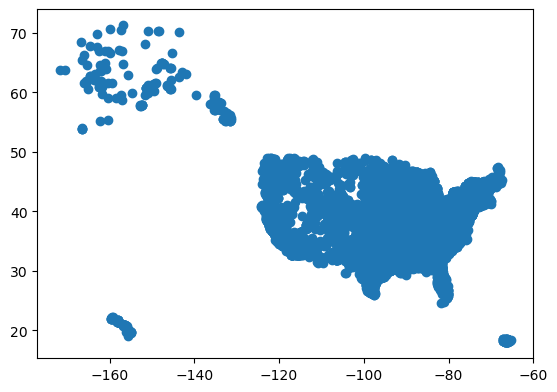

In [84]:
power_plants.plot()  

### f-strings

We have printed variables using string concatenation inside the `print()` function. This means that we write commas between every string and variable we want to print, and then the `print()` function concatenates these into a single string. For example:

In [85]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


f-string = “formatted string”. The simplest syntax for an f-string is:

```default
f" some text {replace}"
```
`replace` can be a variable, an expression, or a function or method call. 

In [86]:
# Explore CRS
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


We just created a string replacing the value inside the curly brackets `{}`.

One of the advantages of using f-strings is that they offer customization for formatting the output:

In [87]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


### Import shapefile

In [88]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


EPSG:4269


<Axes: >

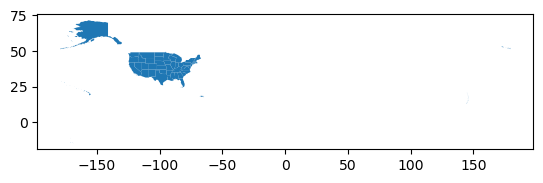

In [89]:
print(states.crs)
states.plot()

### for loops
It can be easier to work with the codes as numbers instead of strings, so let’s update the corresponding columns in the states geo-dataframe. We start by checking the data type of the `region`, `division`, and `statefp` columns:

In [90]:
# Examine if the region, division, and statefp columns are string or numeric
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This is inconvenient because it repeats the same pieces of code, only changing the column name. Instead, using the for loop allows us to succintly print the same information:

In [91]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols: 
    print(column)

region
division
statefp


In [92]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols: 
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


**Don’t Repeat Yourself (DRY)** is a core programming principle that encourages reducing redundancy and consolidating repeated logic. Try implementing it as much as possible! If you need to repeat the “same” code more than twice, you likely need a for loop.

### assert
The `assert` keyword does nothing if the expression next to it evaluates to True and raises an AssertionError exception and stops your code form running any further.

We use it to integrate tests into our code.

In [93]:
# Does nothing if statement is True
assert 2+2 == 4

# Raises an error if statement is False
assert 2+2 == 3

AssertionError: 

A workflow for updating the data type of code columns to be integers:

for each column in code_columns:
    convert column to numeric
    check if column is numeric using assert

In [ ]:
# Update code columns into integers
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])  # Check conversion


In [ ]:
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

## Data Selection
For this lesson, we want to use only the contiguous states. As seen in the plot, the data covers a bigger extension.

<Axes: >

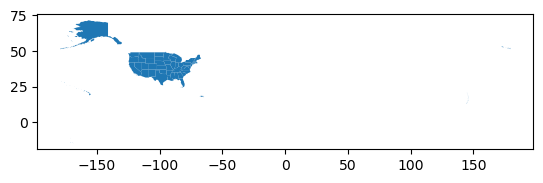

In [ ]:
states.plot()

## Check in
1. What are the unique values for region, division , or states codes in the data?

2. Which codes should we select to only keep states in contiguous US?

In [ ]:
states.head()


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [ ]:
print(states.region.unique())
print(states.division.unique())
print(states.statefp.unique())

['3' '2' '1' '4' '9']
['5' '3' '4' '1' '8' '9' '2' '7' '6' '0']
['54' '12' '17' '27' '24' '44' '16' '33' '37' '50' '09' '10' '35' '06'
 '34' '55' '41' '31' '42' '53' '22' '13' '01' '49' '39' '48' '08' '45'
 '40' '47' '56' '15' '38' '21' '78' '69' '66' '23' '36' '32' '02' '60'
 '26' '05' '28' '29' '30' '20' '18' '72' '46' '25' '51' '11' '19' '04']


<Axes: >

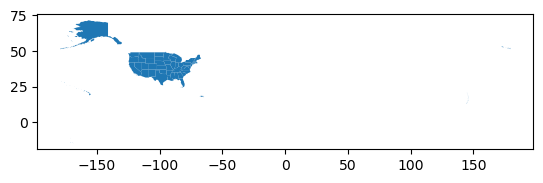

In [ ]:
# Remove region 9 or division 0
# Hawaii and Alsaka haves codes 2 and 15

contiguous = states[(states.region != 9) & (~states.statefp.isin([2, 15]))]
                    # tilda means select everything except 2 & 15
contiguous.plot()

The `~` tilda symbol is used in Python to negate a statement.

## Check-in
Select the data in the power_plants data frame for the contiguous US states.

In [ ]:
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


<Axes: >

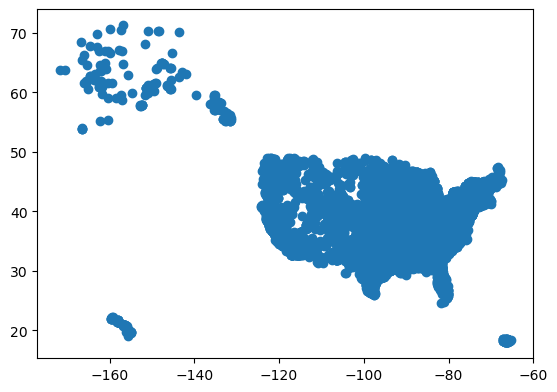

In [ ]:
contiguous_state = power_plants[~ power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]
power_plants.plot()

## Plotting
Before we plot our data, let’s make sure they are in the same CRS:


In [ ]:
contiguous.crs == power_plants.crs

True

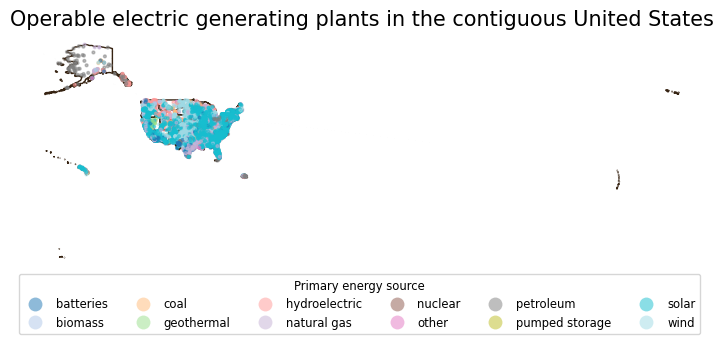

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add states
contiguous.plot(ax=ax,
               color='none',
               edgecolor='#362312')

# Add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource',
                  legend=True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6  
                  })
                  
plt.show()

### `for` with `zip`
Often, we need to iterate simultaneously over two lists (or other iterables).
The `zip()` function in Python allows you to combine two or more lists (or other iterables) so that you can iterate over their elements in pairs. When used with a for loop, it lets you process elements from each list together, like this example:


In [ ]:
# Iterate over a single list
numbers = [1, 2, 3]
for num in numbers:
    print(num)

print('\n')  # Blank line

# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1
2
3


1 a
2 b
3 c


A common situation when code gets repeated is when creating subplots. For example:

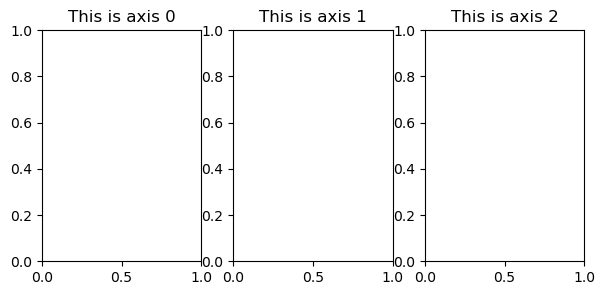

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

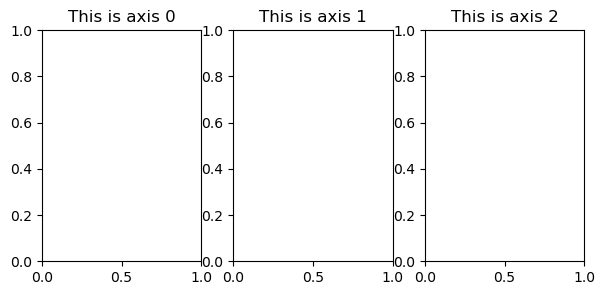

In [ ]:
# Use zip to create  the same subplots and avoid redundancy
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

for ax, i in zip(axes, [0, 1, 2]):
        ax.set_title(f'This is axis {i}')

plt.show()


## Exercise
1. Select the power plants in California in a variable named ca_power_plants.

2. Create a list named top_sources with California’s top 3 electric primary sources.

3. Isolate the California state boundary in a variable named ca_boundary.

4. Recreate the following plot:

In [102]:
power_plants.head(5)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


In [111]:
ca_power_plants = power_plants[power_plants['state'] == 'California'].copy()

In [112]:
top_sources = ['solar', 'natural gas', 'hydroelectric']

In [113]:
ca_boundary = states[states['name'] == 'California'].copy()

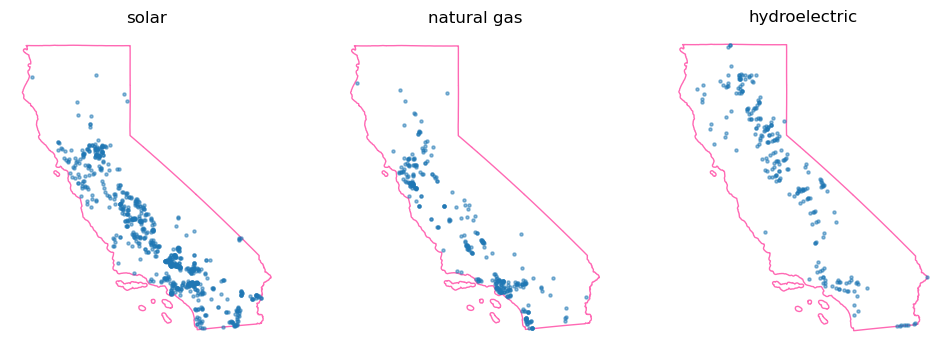

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for ax, i in zip(axes, top_sources):
    ax.set_title(i)
    ax.axis('off')
    ca_boundary.plot(ax = ax,
                     color = 'none',
                     edgecolor = 'hotpink')
    
    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax = ax,
                                                             markersize=5,
                                                             alpha=0.5)